<a href="https://colab.research.google.com/github/sumin2eee/cj-hackathon/blob/heodak/%ED%95%B4%EC%BB%A4%ED%86%A4_%ED%97%88%EB%8B%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

okt= Okt()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.6 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('/content/heo_reviews.csv', encoding='utf-8')
df=df.dropna(axis = 0)
df

,ratings,reviews
0,5,매번떠러짐주문하네요..신선하구마싯또용~~
1,5,배송이 빠르고 만족스러워요
2,5,배송이 빠르고 만족스러워요
3,5,배송이 빨랐어요 먹어보고 괜찮으면 또시킬게요
4,5,배송이 빨랐어요 만족스러유ㅓ요 먹어보고 괜찮으면 또시킬게요
...,...,...
1613,2,먹기가 퍽퍽한 편이네요.
1614,2,함박스테이크가 더 맛있네요. 함박스테이크 사먹으랴구요.
1615,2,함박스테이크가 더 맛있어요. 함박스테이크만 주문해먹으려구요.
1616,1,너무 퍽퍽해요 별롭니다


In [ ]:
df['label'] = np.select([df.ratings > 3], [1], default=0) # 평점으로 레이블 부여
df

,ratings,reviews,label
0,5,매번떠러짐주문하네요..신선하구마싯또용~~,1
1,5,배송이 빠르고 만족스러워요,1
2,5,배송이 빠르고 만족스러워요,1
3,5,배송이 빨랐어요 먹어보고 괜찮으면 또시킬게요,1
4,5,배송이 빨랐어요 만족스러유ㅓ요 먹어보고 괜찮으면 또시킬게요,1
...,...,...,...
1613,2,먹기가 퍽퍽한 편이네요.,0
1614,2,함박스테이크가 더 맛있네요. 함박스테이크 사먹으랴구요.,0
1615,2,함박스테이크가 더 맛있어요. 함박스테이크만 주문해먹으려구요.,0
1616,1,너무 퍽퍽해요 별롭니다,0


In [ ]:
df['ratings'].nunique(), df['reviews'].nunique(), df['label'].nunique() # 중복을 제외한 샘플의 수 카운트

(5, 695, 2)

In [ ]:
df.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 695


In [ ]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42) # 훈련용, 테스트용 3:1 비율로 분리
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 521
테스트용 리뷰의 개수 : 174


<Axes: >

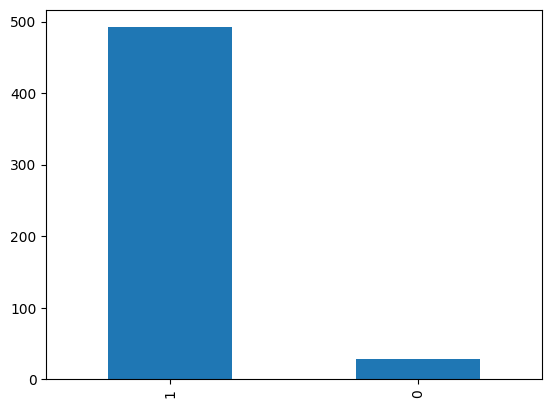

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar') # 훈련 데이터 레이블 분포 확인

In [ ]:
print(df.groupby('label').size().reset_index(name = 'count')) # 80(긍):20(부) 비율

   label  count
0      0     39
1      1    656


In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


<ipython-input-10-5c91c21161d5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 174


<ipython-input-11-5968a3f5f2bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

# 훈련 데이터
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
# 테스트 데이터
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
# 부정 리뷰에는 주로 어떤 단어들이 등장하는 지
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('맛', 9), ('그냥', 5), ('함박스테이크', 4), ('요', 4), ('하고', 4), ('너무', 4), ('구', 3), ('별로', 3), ('합니다', 3), ('먹기', 3), ('퍽퍽', 3), ('배송', 3), ('더', 2), ('맛있어요', 2), ('먹어', 2), ('는데', 2), ('운동', 2), ('편해요', 2), ('좋습니다', 2), ('좋아요', 2)]


In [ ]:
# 긍정 리뷰에는 주로 어떤 단어들이 등장하는 지
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('맛', 124), ('잘', 83), ('배송', 77), ('맛있어요', 69), ('좋아요', 62), ('너무', 46), ('먹기', 45), ('주문', 41), ('포장', 39), ('요', 39), ('빠르고', 38), ('구매', 37), ('으로', 33), ('가슴', 33), ('살', 32), ('먹고', 32), ('허닭', 31), ('닭', 31), ('다이어트', 31), ('또', 26)]


긍정 리뷰의 평균 길이 : 7.134146341463414
부정 리뷰의 평균 길이 : 7.448275862068965


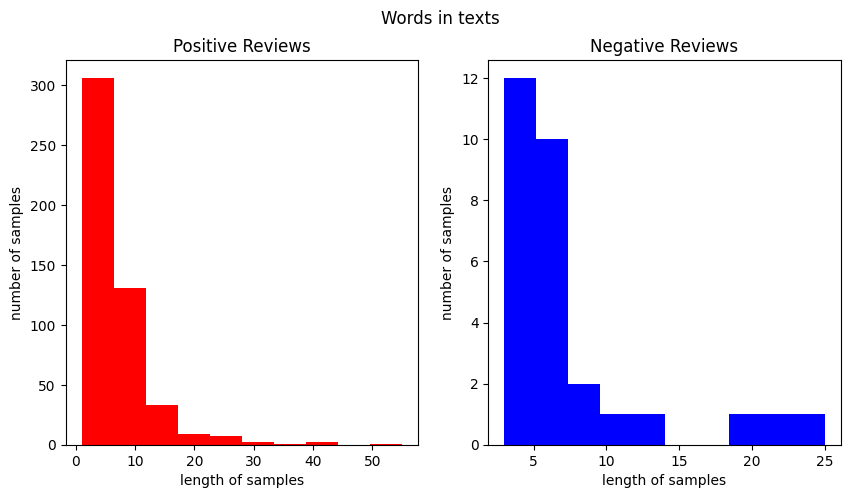

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1151
등장 빈도가 1번 이하인 희귀 단어의 수: 681
단어 집합에서 희귀 단어의 비율: 59.16594265855778
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 18.276972624798713


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 472


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])


[[4, 12, 5, 65, 14, 213, 302, 1, 1, 14, 1, 82], [52, 28, 4, 11, 74, 1, 1, 125, 3, 1], [214, 303, 1, 8, 6]]


In [ ]:
print(X_test[:3])

[[19, 1, 283, 8, 1, 89, 195, 10, 86, 9], [7, 5, 122, 3, 18, 37], [299, 403, 1, 53, 1, 1, 1]]


리뷰의 최대 길이 : 55
리뷰의 평균 길이 : 7.151631477927063


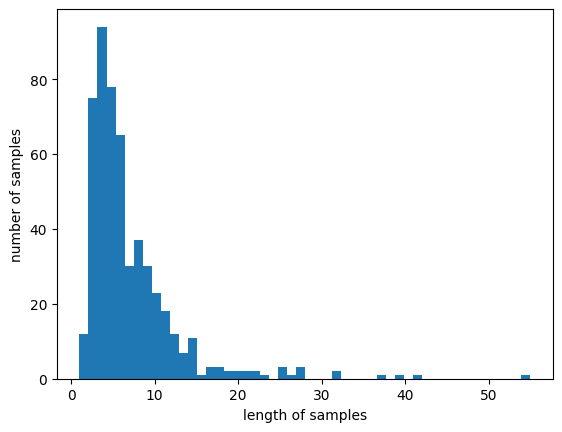

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.80806142034548


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.5816 - acc: 0.8606
Epoch 1: val_acc improved from -inf to 0.95238, saving model to best_model.h5
7/7 [==============================] - 4s 205ms/step - loss: 0.5816 - acc: 0.8606 - val_loss: 0.2877 - val_acc: 0.9524
Epoch 2/15
1/7 [===>..........................] - ETA: 0s - loss: 0.3016 - acc: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - ETA: 0s - loss: 0.2691 - acc: 0.9423
Epoch 2: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 181ms/step - loss: 0.2691 - acc: 0.9423 - val_loss: 0.1920 - val_acc: 0.9524
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.2180 - acc: 0.9423
Epoch 3: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 137ms/step - loss: 0.2180 - acc: 0.9423 - val_loss: 0.1915 - val_acc: 0.9524
Epoch 4/15
7/7 [==============================] - ETA: 0s - loss: 0.2177 - acc: 0.9423
Epoch 4: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 176ms/step - loss: 0.2177 - acc: 0.9423 - val_loss: 0.1926 - val_acc: 0.9524
Epoch 5/15
7/7 [==============================] - ETA: 0s - loss: 0.2060 - acc: 0.9423
Epoch 5: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 192ms/step - loss: 0.2060 - acc: 0.9423 - val_loss: 0.2061 - val_acc: 0.9524
Epo

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 20ms/step - loss: 0.3031 - acc: 0.9425

 테스트 정확도: 0.9425


In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.4124 - acc: 0.8750
Epoch 1: val_acc improved from -inf to 0.95238, saving model to best_model.h5
7/7 [==============================] - 5s 360ms/step - loss: 0.4124 - acc: 0.8750 - val_loss: 0.1922 - val_acc: 0.9524
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.2258 - acc: 0.9423
Epoch 2: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 212ms/step - loss: 0.2258 - acc: 0.9423 - val_loss: 0.2085 - val_acc: 0.9524
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.2286 - acc: 0.9423
Epoch 3: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 118ms/step - loss: 0.2286 - acc: 0.9423 - val_loss: 0.1959 - val_acc: 0.9524
Epoch 4/15
7/7 [==============================] - ETA: 0s - loss: 0.2258 - acc: 0.9423
Epoch 4: val_acc did not improve from 0.95238
7/7 [==============================] - 1s 116ms/step - loss: 0.2258 - acc: 0.94

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 25ms/step - loss: 0.3031 - acc: 0.9425

 테스트 정확도: 0.9425


In [ ]:
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('맛', 124), ('잘', 83), ('배송', 77), ('맛있어요', 69), ('좋아요', 62), ('너무', 46), ('먹기', 45), ('주문', 41), ('포장', 39), ('요', 39), ('빠르고', 38), ('구매', 37), ('으로', 33), ('가슴', 33), ('살', 32), ('먹고', 32), ('허닭', 31), ('닭', 31), ('다이어트', 31), ('또', 26)]


In [ ]:
pwc = positive_word_count.most_common(20)

In [ ]:
!pip install wordcloud

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumSquareR')
#mpl.font_manager._rebuild()

# https://pinkwink.kr/1255 / https://teddylee777.github.io/colab/colab-korean 한글

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 오류(SettingWithCopyError 발생)
pd.set_option('mode.chained_assignment', 'raise') # SettingWithCopyError

# 경고(SettingWithCopyWarning 발생, 기본 값입니다)
pd.set_option('mode.chained_assignment', 'warn') # SettingWithCopyWarning

# 무시
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다


{'맛': 124, '잘': 83, '배송': 77, '맛있어요': 69, '좋아요': 62, '너무': 46, '먹기': 45, '주문': 41, '포장': 39, '요': 39, '빠르고': 38, '구매': 37, '으로': 33, '가슴': 33, '살': 32, '먹고': 32, '허닭': 31, '닭': 31, '다이어트': 31, '또': 26}


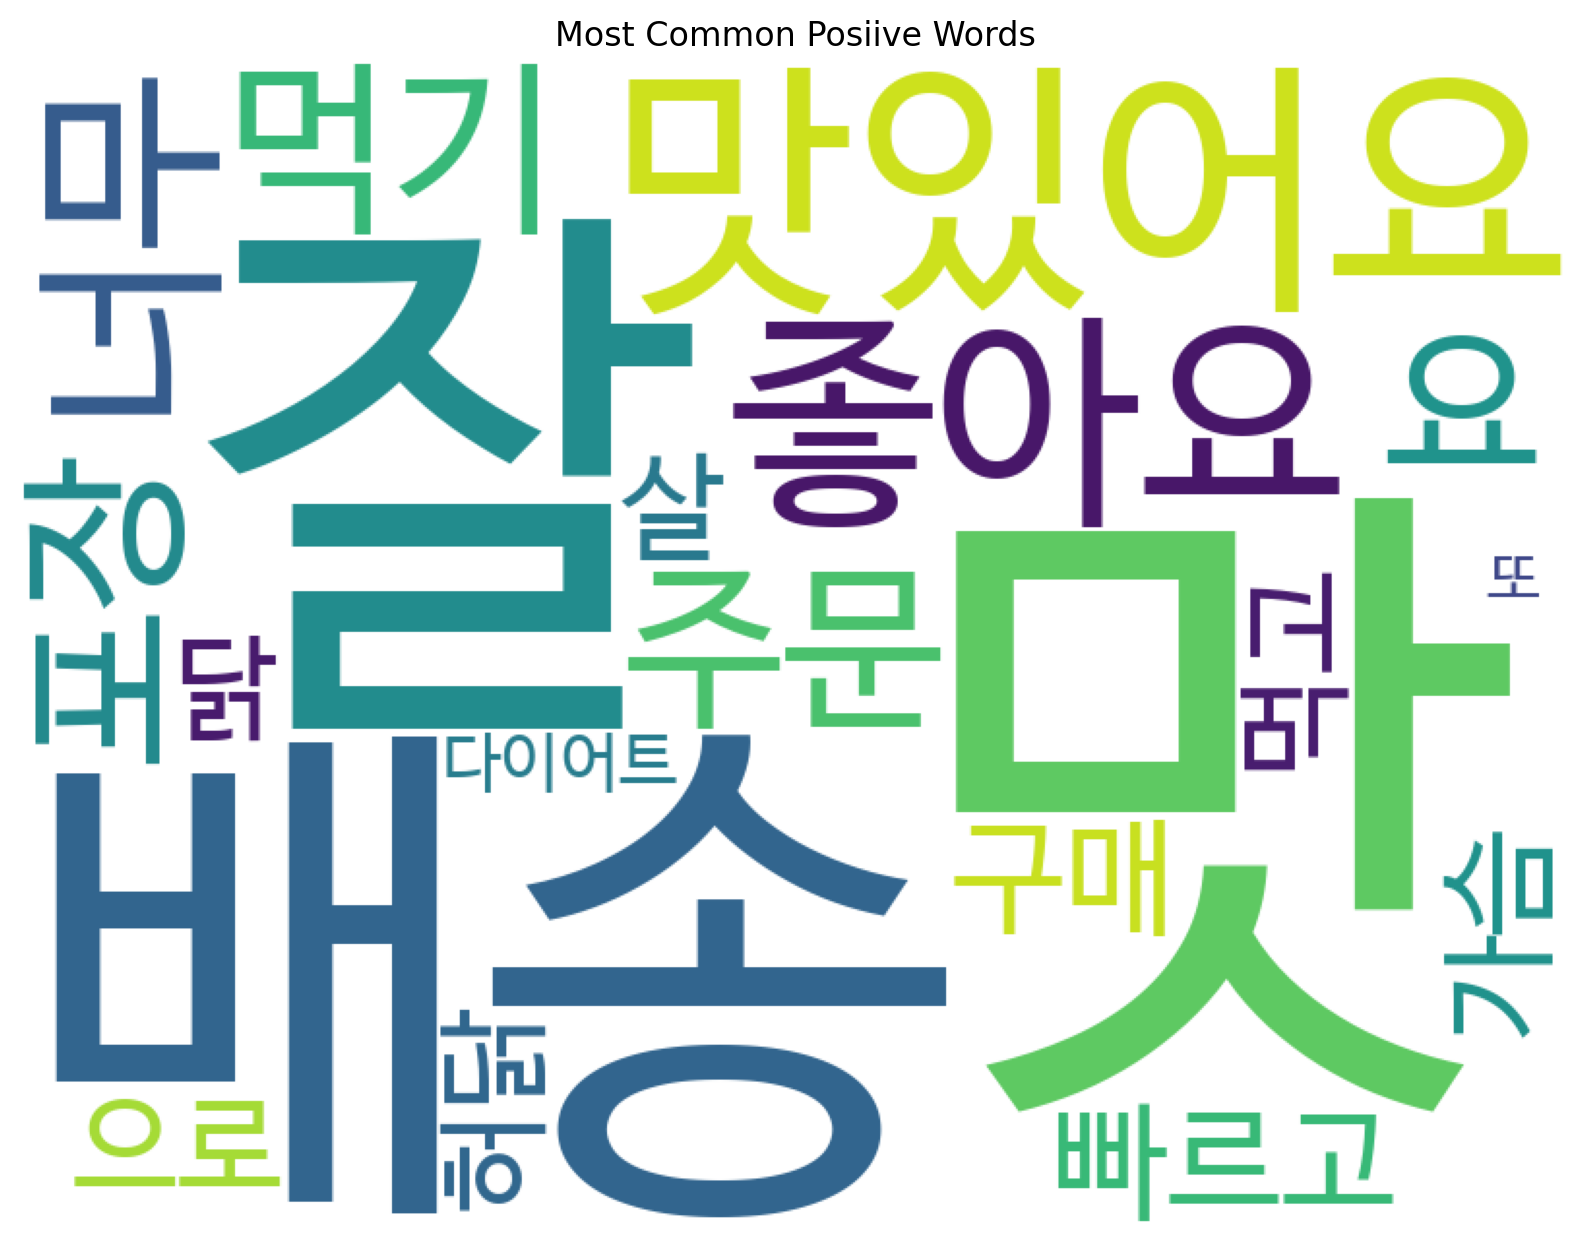

In [ ]:
from wordcloud import WordCloud
#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정

font_path= '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
positive_word_cloud = WordCloud(font_path=fontpath,
               background_color='white', width=800, height=600)

print(dict(pwc))
cloud = positive_word_cloud.generate_from_frequencies(dict(pwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Posiive Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()


In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('맛', 9), ('그냥', 5), ('함박스테이크', 4), ('요', 4), ('하고', 4), ('너무', 4), ('구', 3), ('별로', 3), ('합니다', 3), ('먹기', 3), ('퍽퍽', 3), ('배송', 3), ('더', 2), ('맛있어요', 2), ('먹어', 2), ('는데', 2), ('운동', 2), ('편해요', 2), ('좋습니다', 2), ('좋아요', 2)]


In [ ]:
nwc = negative_word_count.most_common(20)

{'맛': 124, '잘': 83, '배송': 77, '맛있어요': 69, '좋아요': 62, '너무': 46, '먹기': 45, '주문': 41, '포장': 39, '요': 39, '빠르고': 38, '구매': 37, '으로': 33, '가슴': 33, '살': 32, '먹고': 32, '허닭': 31, '닭': 31, '다이어트': 31, '또': 26}


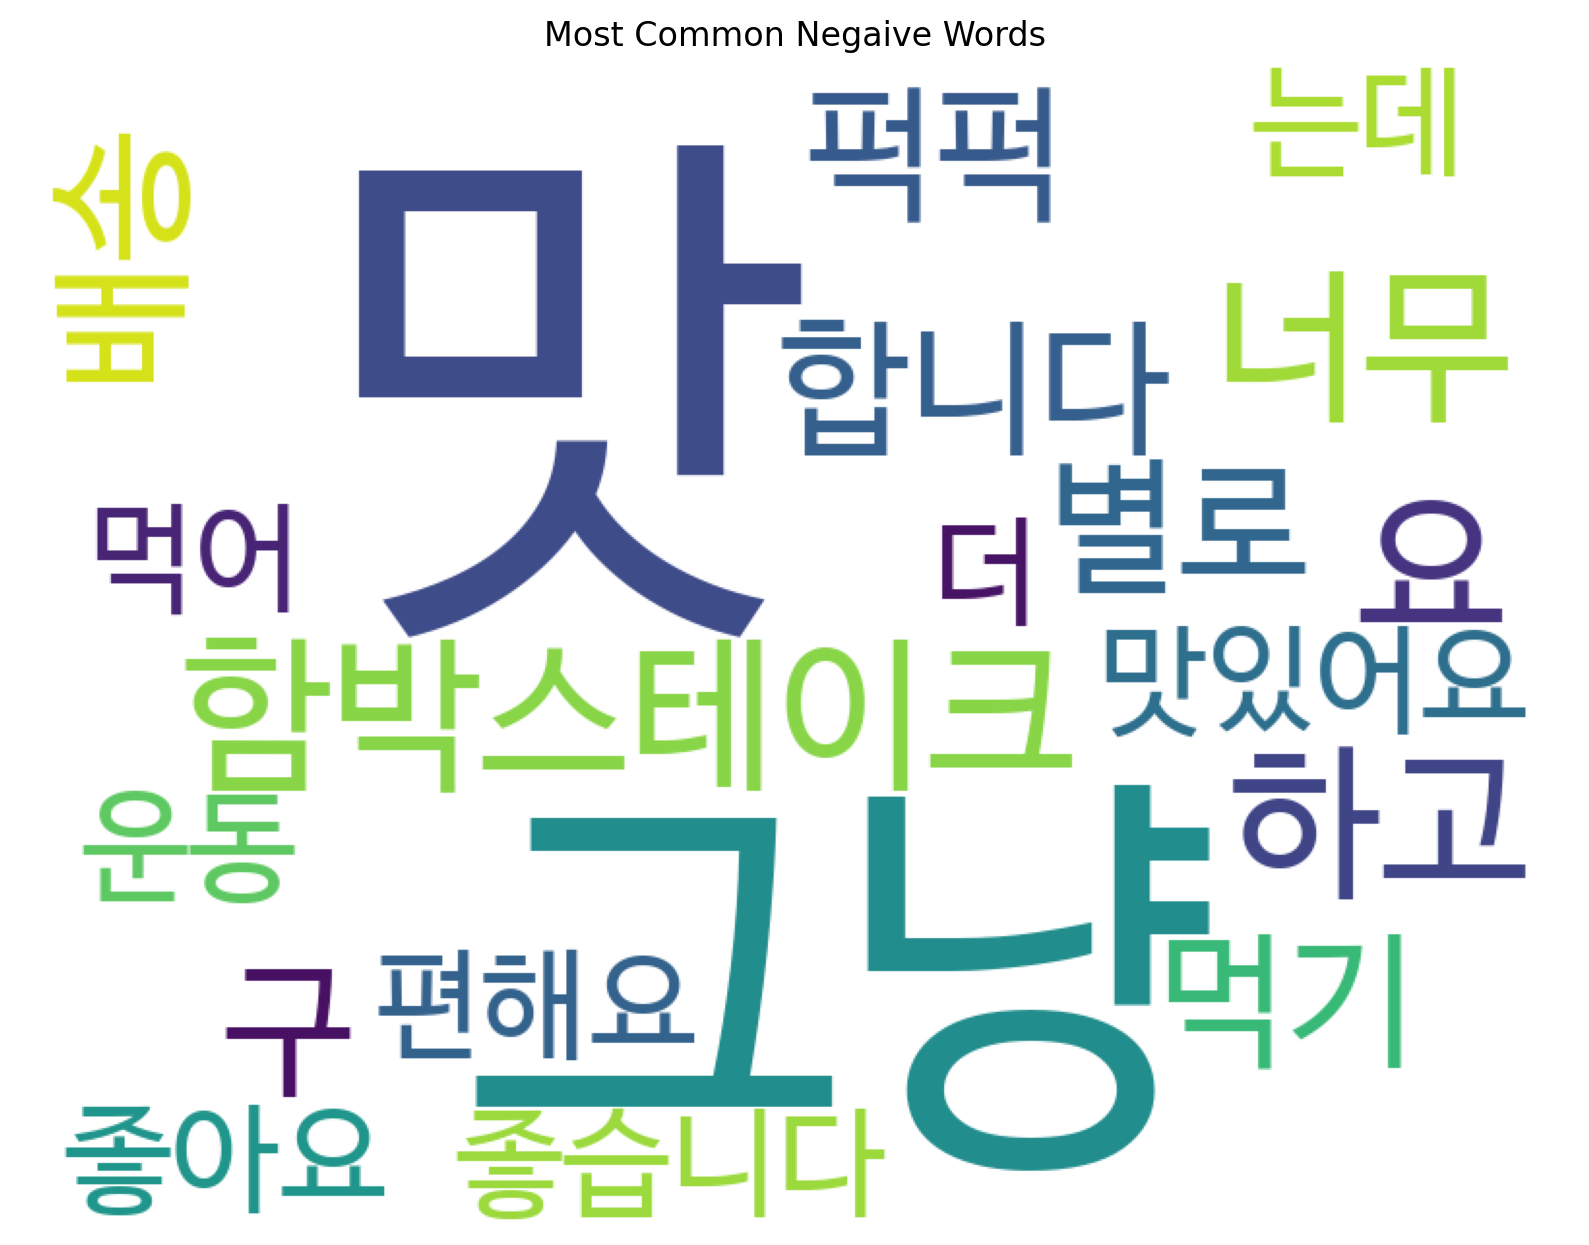

In [ ]:
#wordCloud생성
#한글꺠지는 문제 해결하기위해 font_path 지정

font_path= '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
negative_word_cloud = WordCloud(font_path=fontpath,
               background_color='white', width=800, height=600)

print(dict(pwc))
cloud = negative_word_cloud.generate_from_frequencies(dict(nwc))
plt.figure(figsize=(10, 8))
plt.title('Most Common Negaive Words')
plt.axis('off')
plt.imshow(cloud)
plt.show()
